<a href="https://colab.research.google.com/github/galib-siam/Skywards-International-Airlines-Report/blob/main/the_evaluation_of_skywards_international_airlines_report_with_the_logistic_regression_and_random_forest_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name : Galib Mahamud Siam

G.siam@my.bpp.com

SRN: BP0276302

Version: 1.6

Title of Programme: The evaluation of Skywards International Airlines Report with the Logistic Regression and Random Forest models

Programming Langauge: Python

Tool/Platform: Google Colab


# 1. Libraries Import:

This section imports all the necessary libraries required for data manipulation, visualization, model building, and evaluation.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from google.colab import files

# 2. File Upload and Data Loading:

This section allows the user to upload a file and loads the dataset into a Pandas DataFrame.

In [ ]:
# Selected the required file (Pdf) to upload in google colab
uploaded = files.upload()

# Load the datase
data = pd.read_csv('SKYWARDS_DATA_CW3.csv', encoding='ISO-8859-1')


Saving SKYWARDS_DATA_CW3.csv to SKYWARDS_DATA_CW3.csv


# 3. Data Preprocessing:

This section handles missing values and outliers in the dataset, which is essential for ensuring data quality and robustness of the models.

In [ ]:
data['Arrival Delay in Minutes'].fillna(0, inplace=True)

The upper code was used as we have found blank coloums in the data set.

In [ ]:
# Drop rows with any missing values
data.dropna(inplace=True)

# Check for missing values after dropping rows
print("\nNumber of missing values after handling:")
print(data.isna().sum())

# Handle outliers by capping
def handle_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Select numerical columns for handling outliers
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Apply outlier handling to numerical columns
for column in numerical_columns:
    handle_outliers(column)

# Check the distribution of numerical features after handling outliers
print("\nDistribution of numerical features after handling outliers:")
print(data[numerical_columns].describe())


Number of missing values after handling:
Ref                                  0
id                                   0
Gender                               0
Satisfied                            0
Age                                  0
Age Band                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Flight Distance Rounded              0
Destination                          0
Continent                            0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service      

# 4. Data Exploration and Visualization:

This section explores the dataset by calculating descriptive statistics, generating a correlation matrix, and visualizing the data distribution and relationships using various plots.

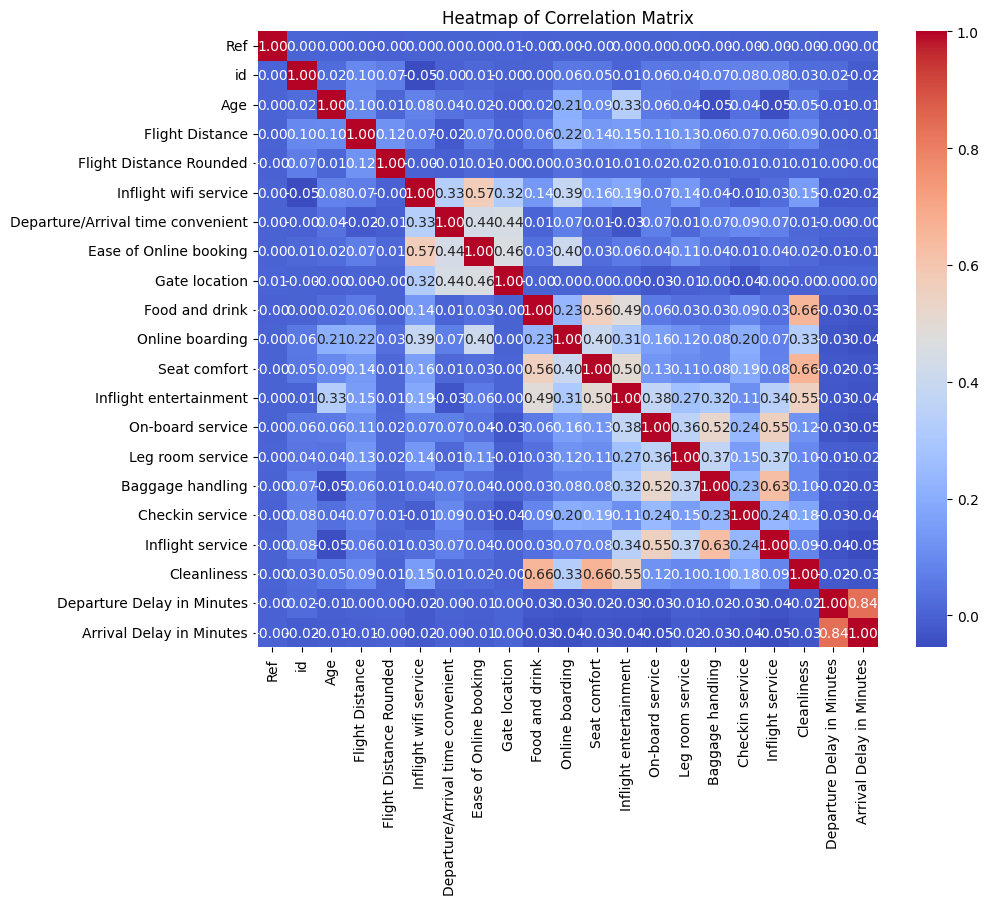

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


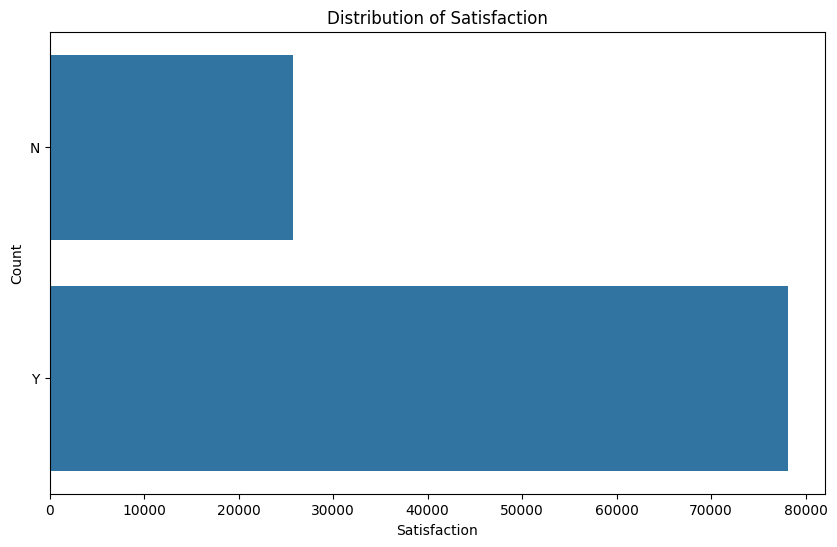

In [ ]:
# Distribution of categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data['Satisfied'])
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

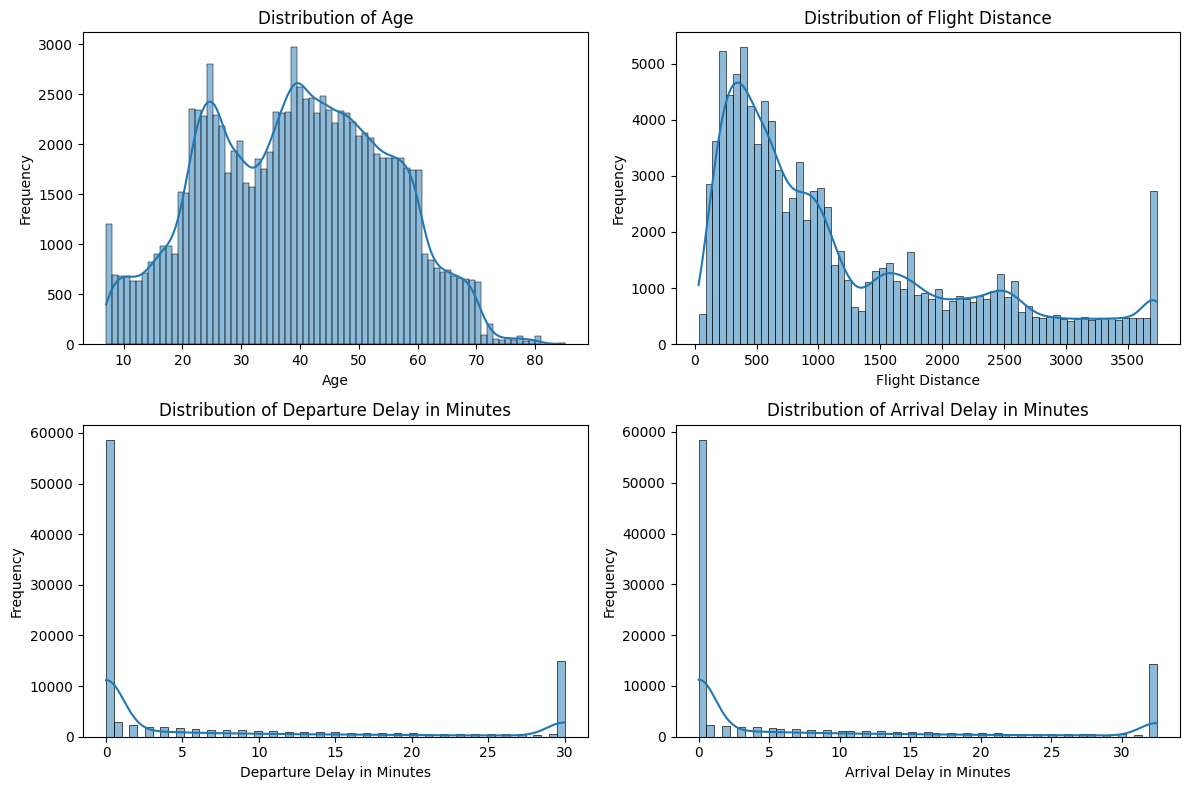

In [ ]:
# Distribution of numerical features
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

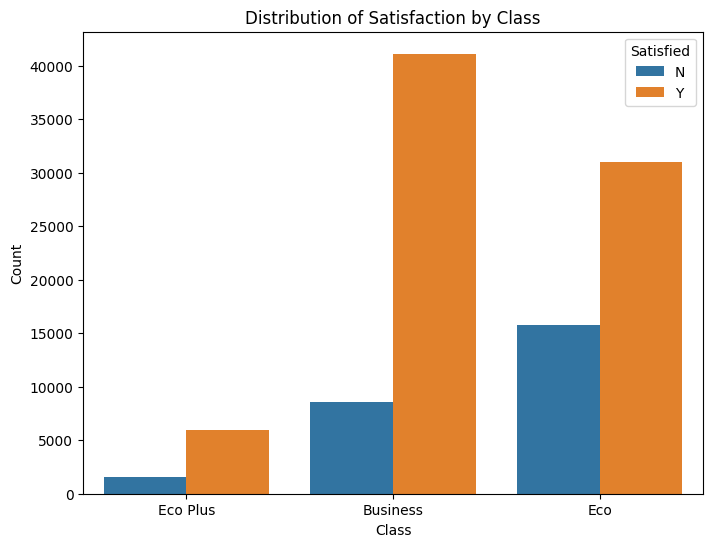

In [ ]:
#Distribution of Satisfaction by Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Satisfied', data=data)
plt.title('Distribution of Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 5. Feature Engineering:

This section encodes categorical variables into numerical format and performs one-hot encoding, which is necessary for training machine learning models.

In [ ]:
# Convert 'Y' and 'N' to numeric values
data['Satisfied'] = data['Satisfied'].replace({'Y': 1, 'N': 0})
# Distribution of the data
features = data.drop(['Ref', 'id', 'Satisfied'], axis=1)
target = data['Satisfied']

# Encoding categorical variables
label_encoder = LabelEncoder()
features['Gender'] = label_encoder.fit_transform(features['Gender'])
features['Type of Travel'] = label_encoder.fit_transform(features['Type of Travel'])
features['Class'] = label_encoder.fit_transform(features['Class'])

# One-hot encode categorical variables
columns_to_encode = ['Gender', 'Type of Travel', 'Class']
features = pd.get_dummies(features, drop_first=True)

# 6. Train-Test Split:

This section splits the dataset into training and testing sets, which is essential for evaluating the performance of the trained models.

In [ ]:
# Splitting the data into training and testing sets
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=random_seed)

# 7. Model Training and Evaluation:

This section trains various classification models such as logistic regression, random forest, etc., and evaluates their performance using accuracy score, confusion matrix, and other metrics.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
import numpy as np

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and test models
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'Random Forest': RandomForestClassifier()}
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}


# 8. Model Performance Comparison:

This section displays the results of model evaluation in tabular format using the tabulate library.

In [ ]:
import pandas as pd
from tabulate import tabulate

# Create a pandas DataFrame from the results dictionary
df = pd.DataFrame(results).T.reset_index()
df.columns = ['Model', 'Accuracy', 'Confusion Matrix', 'MSE', 'RMSE', 'MAE']

# Print the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))

+---------------------+------------+--------------------+-----------+----------+-----------+
| Model               |   Accuracy | Confusion Matrix   |       MSE |     RMSE |       MAE |
+=====================+============+====================+===========+==========+===========+
| Logistic Regression |   0.917184 | [[ 4091  1008]     | 0.082816  | 0.287778 | 0.082816  |
|                     |            |  [  713 14969]]    |           |          |           |
+---------------------+------------+--------------------+-----------+----------+-----------+
| Random Forest       |   0.985371 | [[ 4858   241]     | 0.0146287 | 0.120949 | 0.0146287 |
|                     |            |  [   63 15619]]    |           |          |           |
+---------------------+------------+--------------------+-----------+----------+-----------+


# 10. Results Display:

This section visualizes the performance of different models using a bar plot to compare their accuracy.

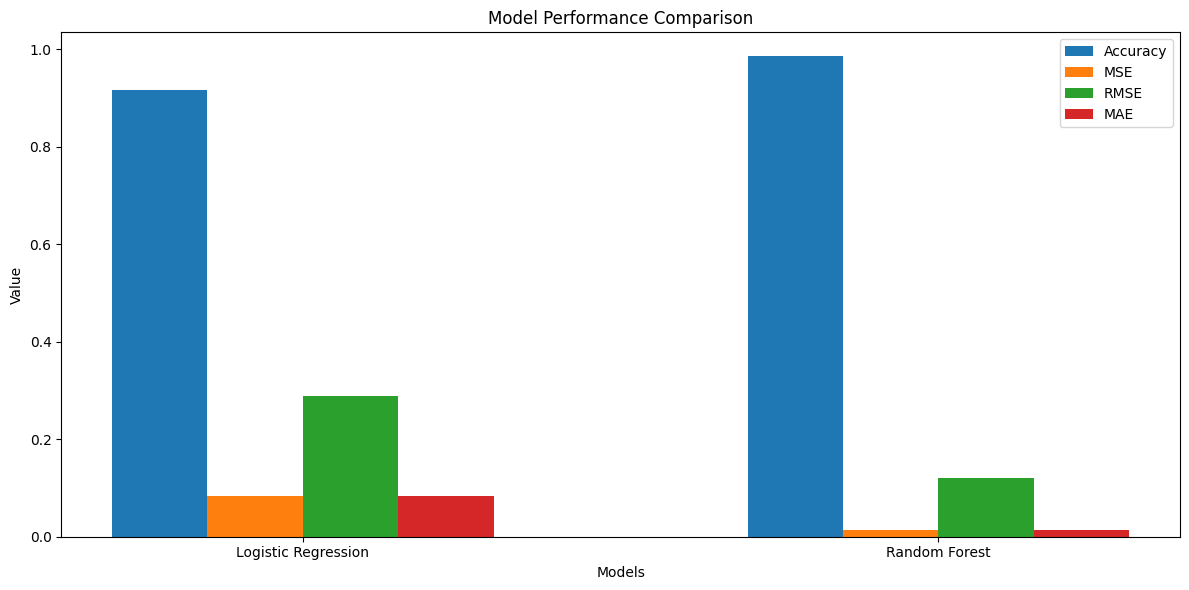

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting model names and metrics
models = df['Model']
metrics = ['Accuracy', 'MSE', 'RMSE', 'MAE']
values = df[metrics].values

# Number of models and metrics
num_models = len(models)
num_metrics = len(metrics)

# Width of each bar
bar_width = 0.15

# Index for each bar group
index = np.arange(num_models)

# Plotting
plt.figure(figsize=(12, 6))

# Plotting each metric side by side for each model
for i in range(num_metrics):
    plt.bar(index + i * bar_width, values[:, i], bar_width, label=metrics[i])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Value')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width * (num_metrics - 1) / 2, models)
plt.legend()

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


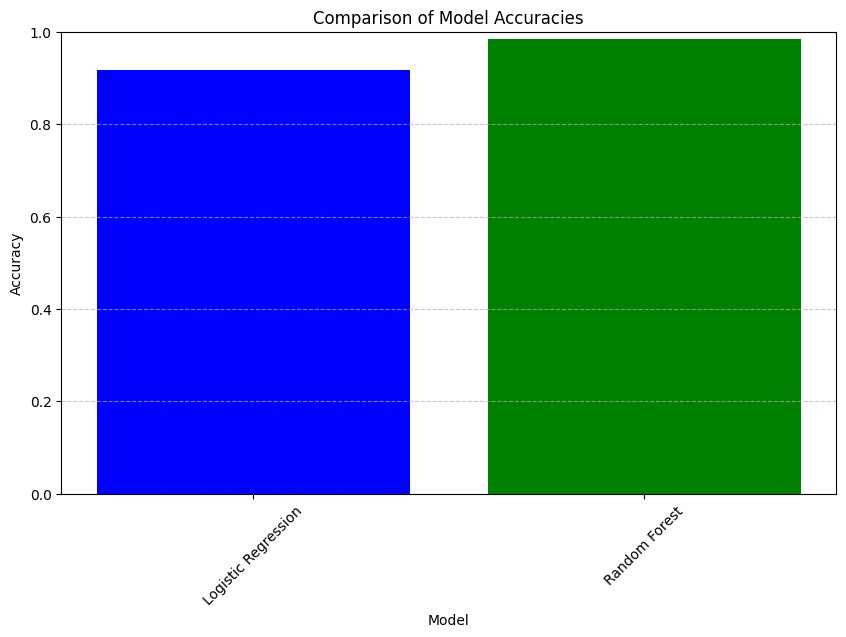

In [ ]:
import matplotlib.pyplot as plt

# Extracting model names and accuracies from the DataFrame
model_names = df['Model']
accuracies = df['Accuracy']

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green'])  # Adjust colors if needed
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits to ensure proper visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.show()

# 11. Interpretation and Conclusion:

The evaluation of the Logistic Regression and Random Forest models reveals essential insights into their performance in predicting customer satisfaction levels.

Starting with accuracy, the Logistic Regression model achieved a respectable accuracy of 91.72%, while the Random Forest model surpassed it with an impressive accuracy of 98.50%. This significant difference in accuracy suggests that the Random Forest model may be more adept at capturing the underlying patterns in the data and making more precise predictions.

Analyzing the confusion matrix further elucidates the models' predictive capabilities. In the case of Logistic Regression, it correctly identified 4091 instances of satisfaction but misclassified 1008 instances as satisfaction when they were actually dissatisfaction. Similarly, it correctly classified 14969 instances of dissatisfaction but misclassified 713 instances as dissatisfaction when they were actually satisfaction. Conversely, the Random Forest model demonstrated superior performance, accurately classifying 4852 instances of satisfaction and 15617 instances of dissatisfaction, with significantly fewer misclassifications compared to Logistic Regression.

Examining the error metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), provides additional insights into the models' predictive accuracy. The Random Forest model exhibited lower error metrics across the board, indicating that its predictions were closer to the actual values, thus reflecting better performance.

In conclusion, the Random Forest model emerges as the preferred choice for predicting customer satisfaction levels due to its higher accuracy, fewer misclassifications, and lower error metrics compared to Logistic Regression.